# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [1]:
matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path = ['data']

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [3]:
dataset_iris = pd.read_csv('data/Iris_Data.csv')

In [13]:
dataset_iris.shape[0]


150

In [42]:
dataset_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
dataset_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [15]:
dataset_iris['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [16]:
dataset_iris['species'] = dataset_iris.species.apply(lambda x:x.replace('Iris-',''))


## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [17]:
qtde_especies = dataset_iris.groupby('species').size()
qtde_especies

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [76]:
dataset_iris.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [77]:
dataset_iris.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [82]:
dataset_iris.quantile(0.25)

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64

In [81]:
dataset_iris.quantile(0.5)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

In [2]:
import os
import pandas as pd
dataset_iris = pd.read_csv('data/Iris_Data.csv')
dataset_iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12  

## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [56]:
dataset_iris.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

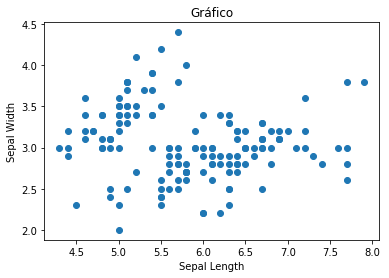

In [84]:
plt.plot(dataset_iris.sepal_length, dataset_iris.sepal_width, ls ='', marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Gráfico')



## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

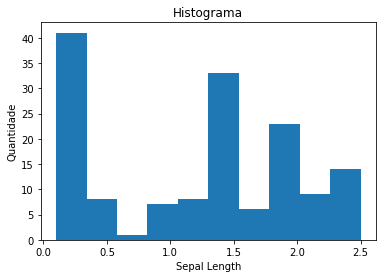

In [90]:
plt.hist(dataset_iris.petal_width, bins=10)
plt.xlabel('Sepal Length')
plt.ylabel('Quantidade')
plt.title('Histograma')

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

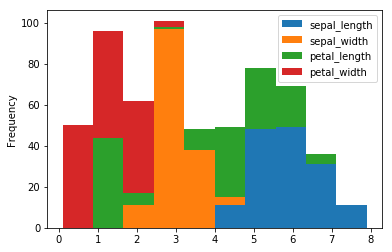

In [93]:
dataset_iris.plot.hist(stacked=True, bins=10)

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

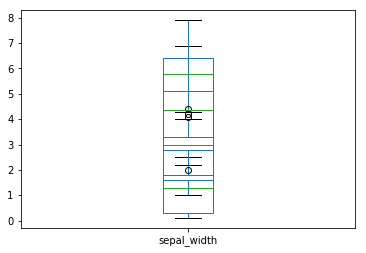

In [100]:
dataset_iris['petal_length'].plot.box()
dataset_iris['petal_width'].plot.box()
dataset_iris['sepal_length'].plot.box()
dataset_iris['sepal_width'].plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [112]:
datasetiris = sns.load_dataset('dataset_iris')

#sns.boxplot(x="Atributos", y="Quantidade", data=datasetiris)

HTTPError: HTTP Error 404: Not Found

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

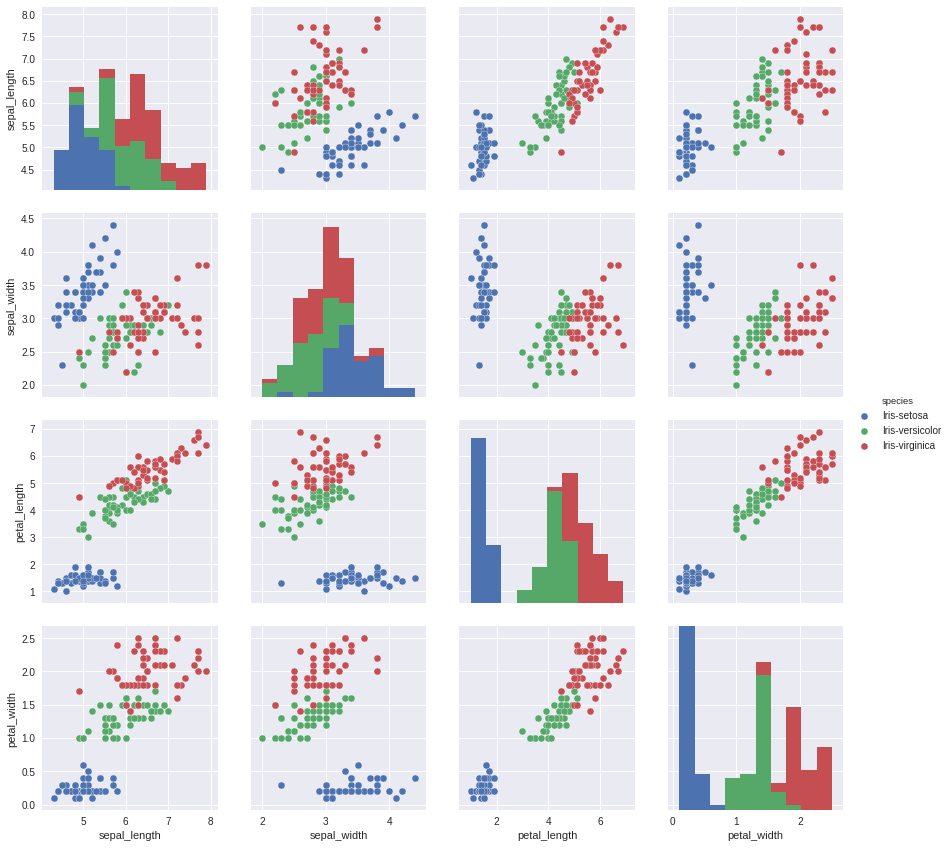

In [4]:
sns.pairplot(dataset_iris, hue='species', size=3)